### Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is binary in nature. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence. Logistic Regression is used for different class of problems known as classification problems. Here the aim is to predict the group to which the current object under observation belongs to. It gives discrete binary outcome between 0 and 1.

Logistic Regression measure the relationship between the dependant variable and one or more independant variables, by estimating probabilities using underlying logistic function.

These probabilities must then be transformed to binary values inorder to actually make a predition.This is the task of logistic function, also called the sigmoid function. This values between 0 and 1 then be transformed into either 0 or 1 using threshold classifier.

- Sigmoid Function
    - The sigmoid function is a S shaped curve that can take any real-valued number and map it into a value between range of 0 and 1, but never exactly at those limits.
- **Logistic vs Linear**
    -Logistic regression gives you discrete outcome but linear regression gives you a continuous outcome

##### Properties of Logistic Regression
- The dependent variable in logistic regression follows Bernoulli Distribution.

- Estimation is done through maximum likelihood.

- No R Square, Model fitness is calculated through Concordance, KS-Statistics.

#### Logistic Regression Assumptions
- Binary logistic regression requires the dependent variable to be binary.

- For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

- Only meaningful variables should be included.

- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

- The independent variables are linearly related to the log odds.

- Logistic regression requires quite large sample sizes.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [4]:
data_set = pd.read_csv('../datasets/Social_Network_Ads.csv')
data_set.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
data_set.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
data_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
data_set.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [11]:
data_set.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [14]:
data_set['Age']

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

<AxesSubplot:>

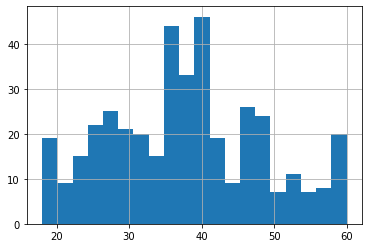

In [12]:
data_set['Age'].hist(bins=20)

In [15]:
age_category = []

for i in range(0,len(data_set['Age'])):
    if data_set['Age'][i] <= 20:
        age_category.append('A')
    elif 20 < data_set['Age'][i] <= 26:
        age_category.append('B')
    elif 26 < data_set['Age'][i] <= 30:
        age_category.append('C')
    elif 30 < data_set['Age'][i] <= 40:
        age_category.append('D')
    elif 40 < data_set['Age'][i] <= 50:
        age_category.append('E')
    else:
        age_category.append('F')

age_dframe = pd.DataFrame(data=age_category, columns=['AgeCategory'])
aug_data_set = pd.concat([data_set,age_dframe],axis=1)
aug_data_set.head()
        

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,15624510,Male,19,19000,0,A
1,15810944,Male,35,20000,0,D
2,15668575,Female,26,43000,0,B
3,15603246,Female,27,57000,0,C
4,15804002,Male,19,76000,0,A


<AxesSubplot:xlabel='Purchased', ylabel='count'>

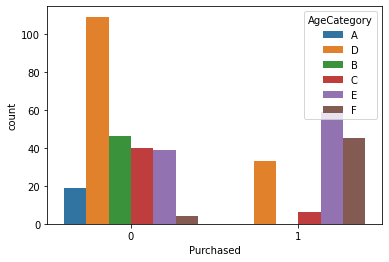

In [16]:
sns.countplot(x='Purchased',hue='AgeCategory',data=aug_data_set)

<AxesSubplot:>

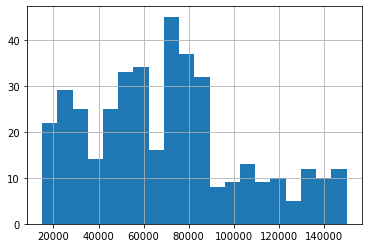

In [17]:
data_set['EstimatedSalary'].hist(bins=20)

In [18]:
income_category = []
for i in range (0, len(data_set ['EstimatedSalary'])):
    if data_set ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < data_set ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < data_set ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < data_set ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < data_set ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < data_set ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < data_set ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
aug_data_set_2 = pd.concat([aug_data_set, income_data_frame], axis = 1)
aug_data_set_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,15624510,Male,19,19000,0,A,Very Low
1,15810944,Male,35,20000,0,D,Low
2,15668575,Female,26,43000,0,B,Moderately Low
3,15603246,Female,27,57000,0,C,Moderately Low
4,15804002,Male,19,76000,0,A,Medium


<AxesSubplot:xlabel='Purchased', ylabel='count'>

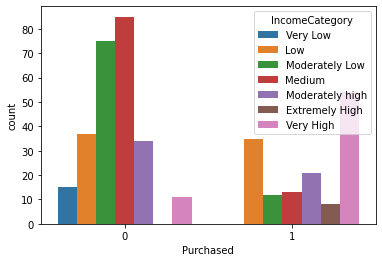

In [19]:
sns.countplot(x='Purchased', hue='IncomeCategory', data=aug_data_set_2)

In [26]:
binary_gender = pd.get_dummies(aug_data_set['Gender'],drop_first=True)
binary_gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [27]:
binary_age = pd.get_dummies(aug_data_set['AgeCategory'])
binary_age.head()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [29]:
binary_income = pd.get_dummies (aug_data_set_2['IncomeCategory'])
binary_income.head ()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [32]:
final_ds = pd.concat([aug_data_set_2,binary_gender,binary_age,binary_income],axis=1)
final_ds1 = final_ds.drop (['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_ds1.head()

,User ID,Purchased,Male,A,B,C,D,E,F,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,15624510,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,15810944,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,15668575,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,15603246,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,15804002,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
X = final_ds1.drop(['Purchased','User ID'],axis=1)
Y = final_ds1['Purchased']

In [38]:
X.head()

,Male,A,B,C,D,E,F,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2, random_state=20)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [45]:
ypred = log_reg.predict(xtest)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [48]:
report  = classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        45
           1       0.97      0.86      0.91        35

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80



In [53]:
print("Accuracy:",metrics.accuracy_score(ytest,ypred))
print("Precision:",metrics.precision_score(ytest,ypred))
print("Recall:",metrics.recall_score(ytest,ypred))

Accuracy: 0.925
Precision: 0.967741935483871
Recall: 0.8571428571428571


In [50]:
confusion_matrix(ytest,ypred)

array([[44,  1],
       [ 5, 30]], dtype=int64)

<AxesSubplot:>

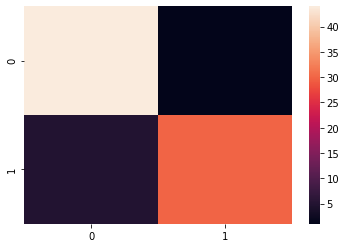

In [51]:
sns.heatmap(confusion_matrix(ytest,ypred))

### ROC Curve

In [58]:
y_pred_prob = log_reg.predict_proba(xtest)[::,1]
y_pred_prob

array([0.01026991, 0.87156765, 0.05058434, 0.03115382, 0.04171697,
       0.05058434, 0.06292955, 0.94039926, 0.08608025, 0.57187087,
       0.31579041, 0.13919711, 0.96858074, 0.32364739, 0.26898514,
       0.05378745, 0.22479585, 0.74918797, 0.01385332, 0.94039926,
       0.05058434, 0.08608025, 0.01385332, 0.03053165, 0.38455666,
       0.60483356, 0.06727819, 0.06504637, 0.74918797, 0.70939207,
       0.05058434, 0.5056698 , 0.06504637, 0.5056698 , 0.05058434,
       0.57187087, 0.08891634, 0.05058434, 0.57187087, 0.38455666,
       0.06727819, 0.05058434, 0.84173885, 0.52664608, 0.87156765,
       0.08608025, 0.06727819, 0.57187087, 0.57187087, 0.57187087,
       0.14929749, 0.84173885, 0.85020103, 0.04029646, 0.38455666,
       0.84173885, 0.08608025, 0.08556899, 0.76119487, 0.51763262,
       0.51763262, 0.06504637, 0.11185962, 0.32454343, 0.32364739,
       0.06504637, 0.5056698 , 0.26115121, 0.6958214 , 0.06504637,
       0.5056698 , 0.06504637, 0.08608025, 0.87156765, 0.11847

In [62]:
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_prob)

In [63]:
auc = metrics.roc_auc_score(ytest, y_pred_prob)
auc

0.9495238095238095

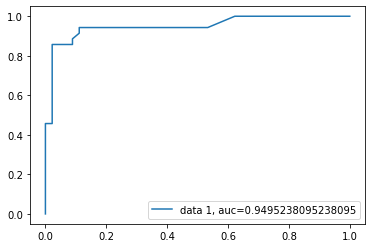

In [64]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()